## Download models

In [1]:
# Berton, Gabriele, Gabriele Trivigno, Barbara Caputo, and Carlo Masone. 2023. “EigenPlaces: Training Viewpoint Robust Models for Visual Place Recognition.” In , 11080–90. https://openaccess.thecvf.com/content/ICCV2023/html/Berton_EigenPlaces_Training_Viewpoint_Robust_Models_for_Visual_Place_Recognition_ICCV_2023_paper.html.
# https://github.com/gmberton/EigenPlaces
import torch

model = torch.hub.load(
    "gmberton/eigenplaces", "get_trained_model", backbone="ResNet50", fc_output_dim=2048
)
del model

/users/eleves-a/2022/haiyang.jiang/.conda/envs/CV/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/users/eleves-a/2022/haiyang.jiang/.conda/envs/CV/lib/python3.10/site-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.co

Returning EigenPlaces model with backbone: ResNet50 with features dimension 2048


/users/eleves-a/2022/haiyang.jiang/.conda/envs/CV/lib/python3.10/site-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/gmberton/cosplace/zipball/main" to /users/eleves-a/2022/haiyang.jiang/.cache/torch/hub/main.zip


Returning CosPlace model with backbone: ResNet50 with features dimension 512


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /users/eleves-a/2022/haiyang.jiang/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 113MB/s]
Downloading: "https://github.com/gmberton/CosPlace/releases/download/v1.0/ResNet50_512_cosplace.pth" to /users/eleves-a/2022/haiyang.jiang/.cache/torch/hub/checkpoints/ResNet50_512_cosplace.pth
100%|██████████| 94.0M/94.0M [00:01<00:00, 55.2MB/s]
Downloading: "https://github.com/gmberton/EigenPlaces/releases/download/v1.0/ResNet50_2048_eigenplaces.pth" to /users/eleves-a/2022/haiyang.jiang/.cache/torch/hub/checkpoints/ResNet50_2048_eigenplaces.pth
100%|██████████| 106M/106M [00:02<00:00, 54.0MB/s] 


## EigenPlaces: street-street

In [2]:
data_dir_path = "/Data/Trans_Proj/data/street_view_images_raw/"

In [3]:
import os
from PIL import Image

import numpy as np

import torch
import torchvision.transforms as tfm

import matplotlib.pyplot as plt

# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

/users/eleves-a/2022/haiyang.jiang/.conda/envs/CV/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:0


In [4]:
model = torch.hub.load(
    "gmberton/eigenplaces", "get_trained_model", backbone="ResNet50", fc_output_dim=2048
)
model = model.to(device)

Using cache found in /users/eleves-a/2022/haiyang.jiang/.cache/torch/hub/gmberton_eigenplaces_main


Returning EigenPlaces model with backbone: ResNet50 with features dimension 2048


Using cache found in /users/eleves-a/2022/haiyang.jiang/.cache/torch/hub/gmberton_cosplace_main


Returning CosPlace model with backbone: ResNet50 with features dimension 512


In [5]:
transform = tfm.Compose(
            [
                tfm.Resize((224, 224)),
                tfm.ToTensor(),
                tfm.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ]
        )

## Single Pair Test

Text(0.5, 1.0, 'Negative')

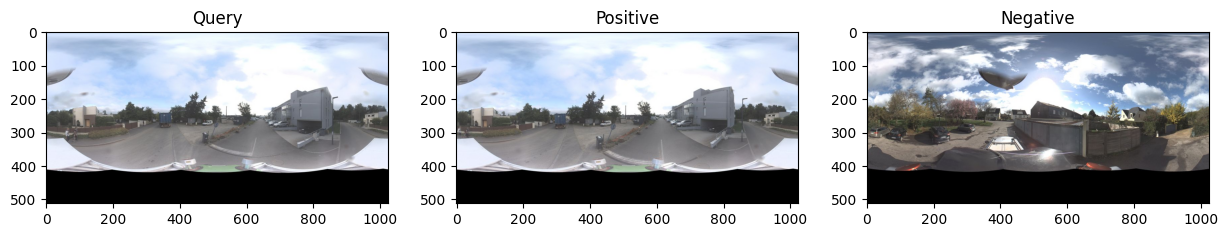

In [5]:
model = model.eval()
transforms = tfm.Compose(
    [
        tfm.ToTensor(),
        tfm.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

query_img = Image.open(
    os.path.join(data_dir_path, "142250751549825.jpg")
)
positive_img = Image.open(
    os.path.join(data_dir_path, "146843414386160.jpg")
)
negative_img = Image.open(
    os.path.join(data_dir_path, "100130695962400.jpg")
)
_, axs = plt.subplots(ncols=3, figsize=(15, 5))
a = -1
a += 1
plt.sca(axs[a])
plt.imshow(query_img)
plt.title("Query")
a += 1
plt.sca(axs[a])
plt.imshow(positive_img)
plt.title("Positive")
a += 1
plt.sca(axs[a])
plt.imshow(negative_img)
plt.title("Negative")


In [7]:
print(query_img.size)

(1024, 512)


In [6]:
query_embeddings = (
    model(torch.unsqueeze(transforms(query_img).to(device), 0)).cpu().detach().numpy()
)
positive_embeddings = (
    model(torch.unsqueeze(transforms(positive_img).to(device), 0))
    .cpu()
    .detach()
    .numpy()
)
negative_embeddings = (
    model(torch.unsqueeze(transforms(negative_img).to(device), 0))
    .cpu()
    .detach()
    .numpy()
)

query_embeddings /= np.linalg.norm(query_embeddings)
positive_embeddings /= np.linalg.norm(positive_embeddings)
negative_embeddings /= np.linalg.norm(negative_embeddings)


In [8]:
print(
    f"Query vs positive cosine similarity: {100*(query_embeddings @ positive_embeddings.T)[0, 0]:.2f}%"
)
print(
    f"Query vs negative cosine similarity: {100*(query_embeddings @ negative_embeddings.T)[0, 0]:.2f}%"
)

Query vs positive cosine similarity: 89.26%
Query vs negative cosine similarity: 19.23%


## Test on dataset

In [6]:
output_dir = "/users/eleves-a/2022/haiyang.jiang/Trans_Proj/repo/VPR_Proj/result/EigenPlaces/"

In [7]:
test_neighbors_path = '/users/eleves-a/2022/haiyang.jiang/Trans_Proj/data/neighbors/new_test_neighbors.csv'
test_strangers_path = '/users/eleves-a/2022/haiyang.jiang/Trans_Proj/data/neighbors/new_test_strangers.csv'

In [8]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics.pairwise import cosine_similarity
import csv
from tqdm import tqdm
from torch.utils.data.dataloader import default_collate

In [15]:
def load_and_transform_image(image_path, transform=transform, device="cpu"):
    image = Image.open(image_path).convert('RGB')
    transformed_image = transform(image).to(device)  # Add batch dimension and move to device
    return transformed_image

In [21]:
class ImagePairDataset(Dataset):
    def __init__(self, csv_file, slice=[0, -1], test=False):
        self.pairs_frame = pd.read_csv(csv_file, sep=',', dtype=str)
        print(f"Totally {len(self.pairs_frame)} data to be processed.")

        if slice[1] == -1:
            self.pairs_frame = self.pairs_frame.iloc[slice[0]:]
        else:
            self.pairs_frame = self.pairs_frame.iloc[slice[0]:slice[1]]

        print(f"This round, totally {len(self.pairs_frame)} data to be processed.")

        if test:
            self.pairs_frame = self.pairs_frame.iloc[:100]

        # Initialize an empty list to store preloaded images and labels
        self.preloaded_images = []
        self.image_pairs = []

        error_counter = 0
        for index, row in self.pairs_frame.iterrows():
            query_img_name = str(row[0])
            target_img_name = str(row[1])
            
            # Attempt to load and transform each image pair
            try:
                query_image = load_and_transform_image(
                                os.path.join(data_dir_path, query_img_name + ".jpg"), 
                                transform)
                
                target_image = load_and_transform_image(
                                os.path.join(data_dir_path, target_img_name + ".jpg"), 
                                transform)

                # Store the preloaded and transformed images
                self.preloaded_images.append((query_image, target_image))
                self.image_pairs.append((query_img_name, target_img_name))
            except Exception as e:
                # This catches any exception, logging the error and skipping the problematic image pair
                print(f"Warning: Skipping image pair {query_img_name}, {target_img_name} due to an error: {e}")
                error_counter += 1

        print(f"-----Totally {error_counter} errors happened during loading images.")

    def __len__(self):
        return len(self.pairs_frame)

    def __getitem__(self, idx):
        # Returns the preloaded and processed image tensors along with their file names
        return self.preloaded_images[idx], self.image_pairs[idx]

In [10]:
def collate_fn(batch):
    batch_query_image = [item['query_image'] for item in batch]
    batch_target_image = [item['target_image'] for item in batch]
    batch_query_path = [item['query_path'] for item in batch]
    batch_target_path = [item['target_path'] for item in batch]

    # Use the default_collate to combine the lists into batch tensors
    batch_query_image = default_collate(batch_query_image)
    batch_target_image = default_collate(batch_target_image)
    
    # For paths or any non-tensor data, you don't need to collate
    return {
        'query_image': batch_query_image,
        'target_image': batch_target_image,
        'query_path': batch_query_path,
        'target_path': batch_target_path
    }

In [17]:
def process_batch(model, device, img_batch):
    query_images, target_images = img_batch
    query_images = query_images.to(device)
    target_images = target_images.to(device)

    model.eval()
    with torch.no_grad():
        query_embeddings = model(query_images)
        target_embeddings = model(target_images)

    # Calculate cosine similarity
    similarities = torch.nn.functional.cosine_similarity(query_embeddings, target_embeddings)
    return similarities.cpu().numpy()

In [18]:
def pipeline(dataset, output_result_name, batch_size=32, num_worker=4, verbose=False):
    model.eval()

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_worker)   # NOTE: GPU

    all_similarities = []
    # Open a CSV file to save the similarities
    with open(output_result_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write the header
        writer.writerow(['Query', 'Target', 'Similarity'])

        for images_batch, filename_batch in tqdm(dataloader, desc="Processing batches"):

            similarities = process_batch(model, device, images_batch)
            all_similarities.extend(similarities)

            if verbose:
                print("query_images.shape", images_batch[0].shape)
                print("target_images.shape", images_batch[1].shape)
                print("similarities.shape", similarities.shape)
            
            # Write each pair and its similarity to the CSV file
            for i in range(len(filename_batch[0])):
                writer.writerow([(filename_batch[0][i]), (filename_batch[1][i]), similarities[i].item()]) # Convert similarity to a Python scalar with .item()

        print("All similarities have been saved to similarities.csv")

        return all_similarities

In [25]:
def get_max_existing_number(dir_path):
    # 获取已存在的文件名中的最大编号
    existing_files = os.listdir(dir_path)
    max_existing_number = 0
    for filename in existing_files:
        parts = filename[:-4].split('_')
        if parts[-1].isdigit():
            max_existing_number = max(max_existing_number, int(parts[-1]))

    print(max_existing_number)
    return max_existing_number

In [22]:
neighbors_dataset = ImagePairDataset(test_neighbors_path, test=False, slice=[0,5000])

Totally 119395 data to be processed.
-----Totally 0 errors happened during loading images.


In [26]:
max_existing_number = get_max_existing_number(output_dir + "neighbors/")

0


In [27]:
test_neighbors_similarities = pipeline(neighbors_dataset, output_dir + "neighbors/" + "test_neighbors_" + str(max_existing_number+1) + ".csv")

Processing batches: 100%|██████████| 4/4 [00:00<00:00,  8.91it/s]

All similarities have been saved to similarities.csv


In [ ]:
# test_strangers_similarities = pipeline(test_strangers_path, output_dir + "test_strangers.csv")